In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/cleaned_dataset.csv')
df.head()

,Calculated_Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Season,Profit_Margin
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45.0,120.0,590.0,360.0,950.0,Autumn,62.105263
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45.0,120.0,590.0,360.0,950.0,Autumn,62.105263
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45.0,120.0,1366.0,1035.0,2401.0,Spring,56.892961
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45.0,120.0,1188.0,900.0,2088.0,Spring,56.896552
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45.0,120.0,238.0,180.0,418.0,Spring,56.937799


# 1. Correlation Heatmap

The heatmap shows how Revenue relates to other numeric variables (Order_Quantity, Unit_Cost, Unit_Price, Profit).

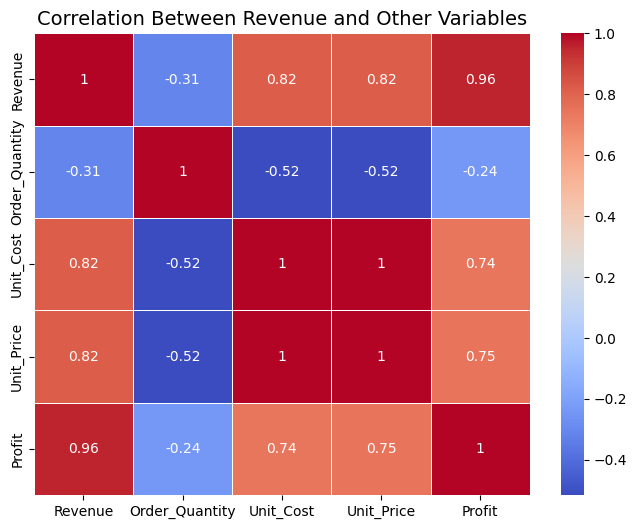

In [ ]:
# Select numeric columns
numeric_cols = ["Revenue", "Order_Quantity", "Unit_Cost", "Unit_Price", "Profit"]
correlation_matrix = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Revenue and Other Variables", fontsize=14)
plt.show()


# 2. Total Revenue by Season

Aggregates total revenue for each season.

/tmp/ipython-input-20777268.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_season_revenue.index, y=avg_season_revenue.values, palette="viridis")


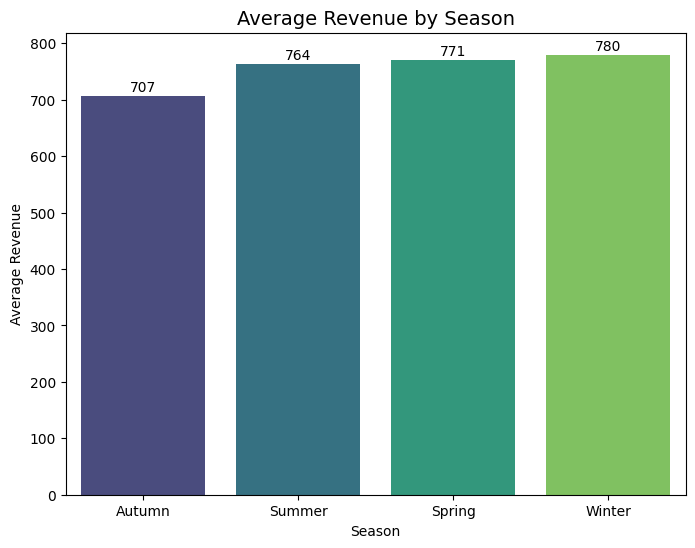

In [ ]:
# Group by season and calculate average revenue
avg_season_revenue = df.groupby("Season")["Revenue"].mean().sort_values()

# Create bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_season_revenue.index, y=avg_season_revenue.values, palette="viridis")

plt.title("Average Revenue by Season", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Average Revenue")

# Show values on top of bars
for i, value in enumerate(avg_season_revenue.values):
    plt.text(i, value + (value * 0.01), f"{value:,.0f}", ha='center', fontsize=10)

plt.show()


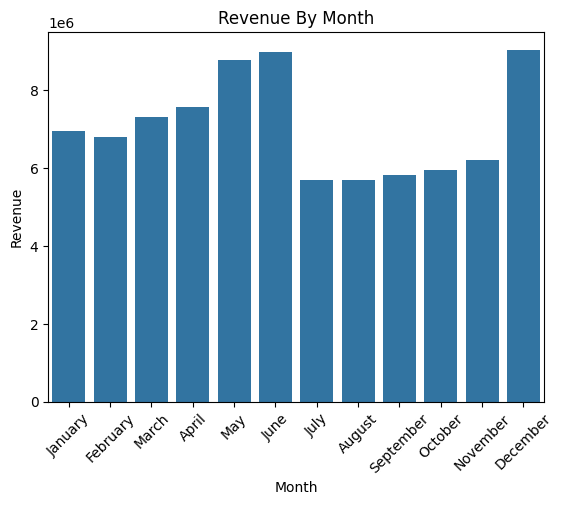

In [ ]:
# Revenue By Month
month_order = ["January","February","March","April","May","June","July",
               "August","September","October","November","December"]
monthly = df.groupby("Month")["Revenue"].sum().reindex(month_order).reset_index()
sns.barplot(data=monthly, x="Month", y="Revenue")
plt.xticks(rotation=45)
plt.title("Revenue By Month")
plt.show()

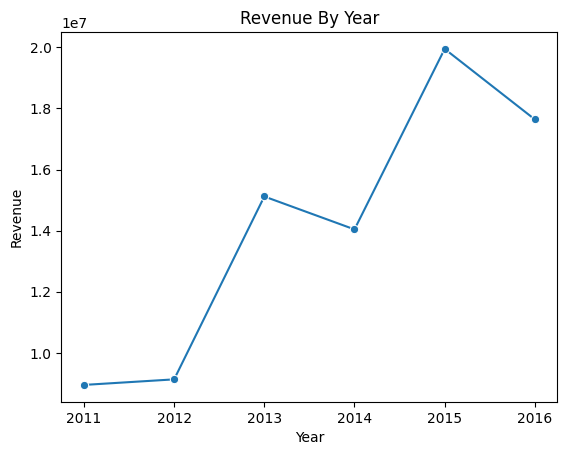

In [ ]:
# Revenue By year
yearly = df.groupby("Year")["Revenue"].sum().reset_index()
sns.lineplot(data=yearly, x="Year", y="Revenue", marker="o")
plt.title("Revenue By Year")
plt.show()


# 4. Sales by Age Group

How sales differ in different age groups.

In [ ]:
# Group by Age Group
age_group_sales = df.groupby("Age_Group")["Revenue"].sum().sort_values(ascending=False)

# Group by Gender
gender_sales = df.groupby("Customer_Gender")["Revenue"].sum().sort_values(ascending=False)

# Group by Country
country_sales = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False)

# Group by Product Category
category_sales = df.groupby("Product_Category")["Revenue"].sum().sort_values(ascending=False)

age_group_sales, gender_sales, country_sales, category_sales


(Age_Group
 Adults (35-64)          42367181.0
 Young Adults (25-34)    30467032.0
 Youth (<25)             11685489.0
 Seniors (64+)             307070.0
 Name: Revenue, dtype: float64,
 Customer_Gender
 M    43132083.0
 F    41694689.0
 Name: Revenue, dtype: float64,
 Country
 United States     27777098.0
 Australia         21196395.0
 United Kingdom    10575628.0
 Germany            8956724.0
 France             8414745.0
 Canada             7906182.0
 Name: Revenue, dtype: float64,
 Product_Category
 Bikes          61434484.0
 Accessories    15022766.0
 Clothing        8369522.0
 Name: Revenue, dtype: float64)

/tmp/ipython-input-2491389394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_sales.index, y=age_group_sales.values, palette="Blues_r")


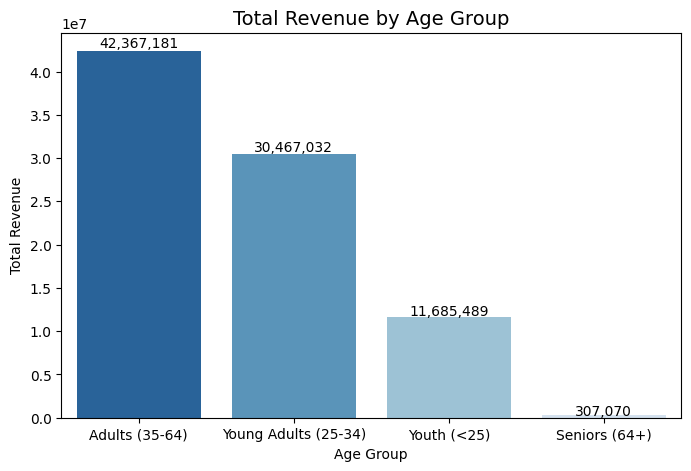

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_sales.index, y=age_group_sales.values, palette="Blues_r")
plt.title("Total Revenue by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Total Revenue")

# Add labels on bars
for i, value in enumerate(age_group_sales.values):
    plt.text(i, value + (value * 0.01), f"{value:,.0f}", ha='center', fontsize=10)
plt.show()

# 5. Sales by Gender

/tmp/ipython-input-1785903770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_sales.index, y=gender_sales.values, palette="coolwarm")


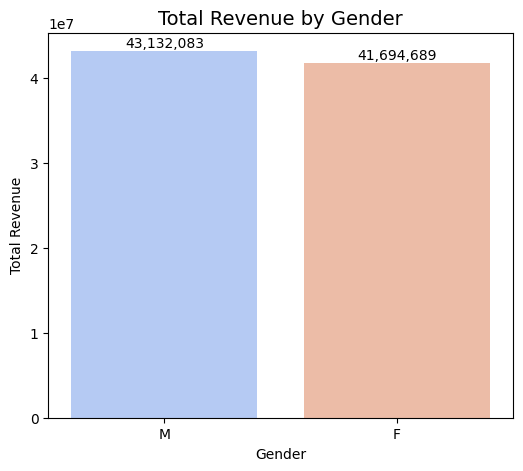

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x=gender_sales.index, y=gender_sales.values, palette="coolwarm")
plt.title("Total Revenue by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Total Revenue")

for i, value in enumerate(gender_sales.values):
    plt.text(i, value + (value * 0.01), f"{value:,.0f}", ha='center', fontsize=10)
plt.show()

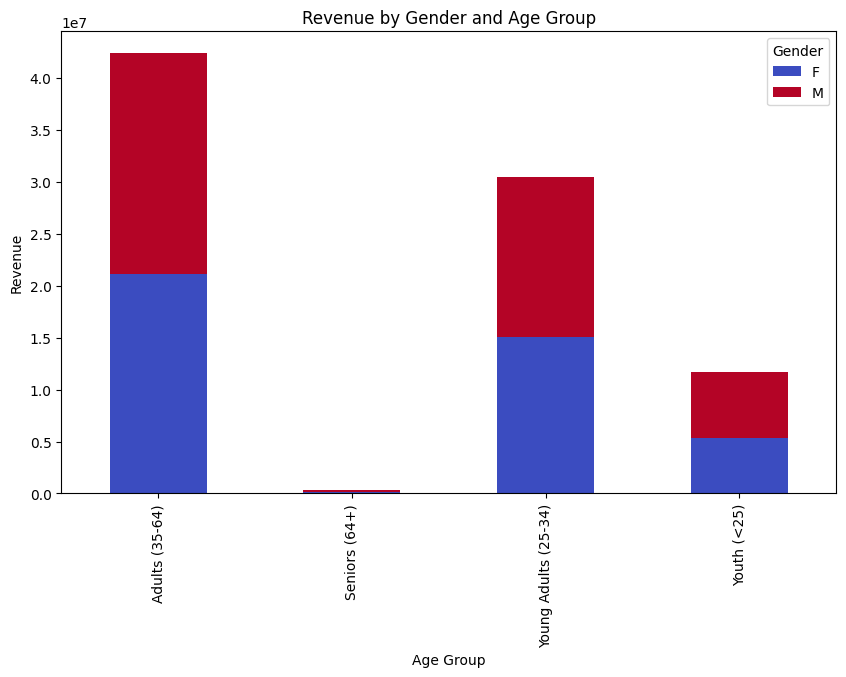

In [ ]:
# Sales by Gender and Age Group (Stacked Bar)
sales_gender_age = df.groupby(["Age_Group", "Customer_Gender"])["Revenue"].sum().unstack()

sales_gender_age.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm")
plt.title("Revenue by Gender and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Revenue")
plt.legend(title="Gender")
plt.show()

# 6. Sales by country

/tmp/ipython-input-398151279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index, y=country_sales.values, palette="viridis")


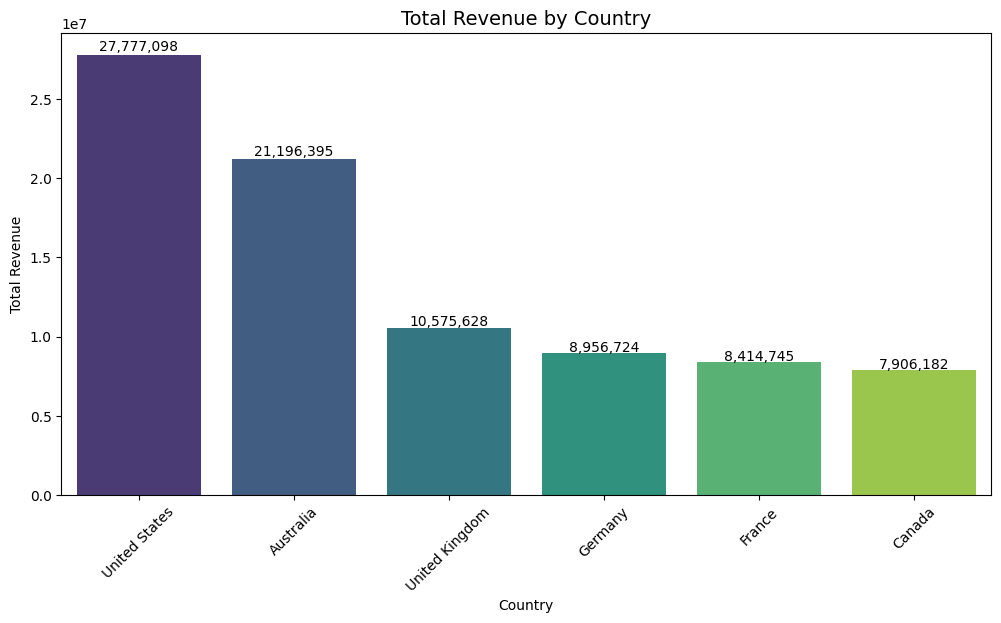

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.index, y=country_sales.values, palette="viridis")
plt.title("Total Revenue by Country", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i, value in enumerate(country_sales.values):
    plt.text(i, value + (value * 0.01), f"{value:,.0f}", ha='center', fontsize=10)
plt.show()


# 7. Sales by product category

/tmp/ipython-input-1093661409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="mako")


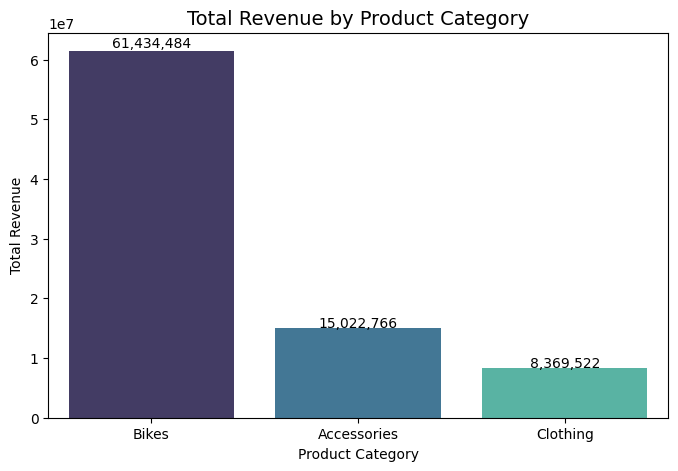

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="mako")
plt.title("Total Revenue by Product Category", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")

for i, value in enumerate(category_sales.values):
    plt.text(i, value + (value * 0.01), f"{value:,.0f}", ha='center', fontsize=10)
plt.show()


# 8. Combined Comparison

/tmp/ipython-input-79219892.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_sales.index, y=age_group_sales.values, palette="Blues_r")
/tmp/ipython-input-79219892.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_sales.index, y=gender_sales.values, palette="coolwarm")
/tmp/ipython-input-79219892.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index, y=country_sales.values, palette="viridis")
/tmp/ipython-input-79219892.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is depreca

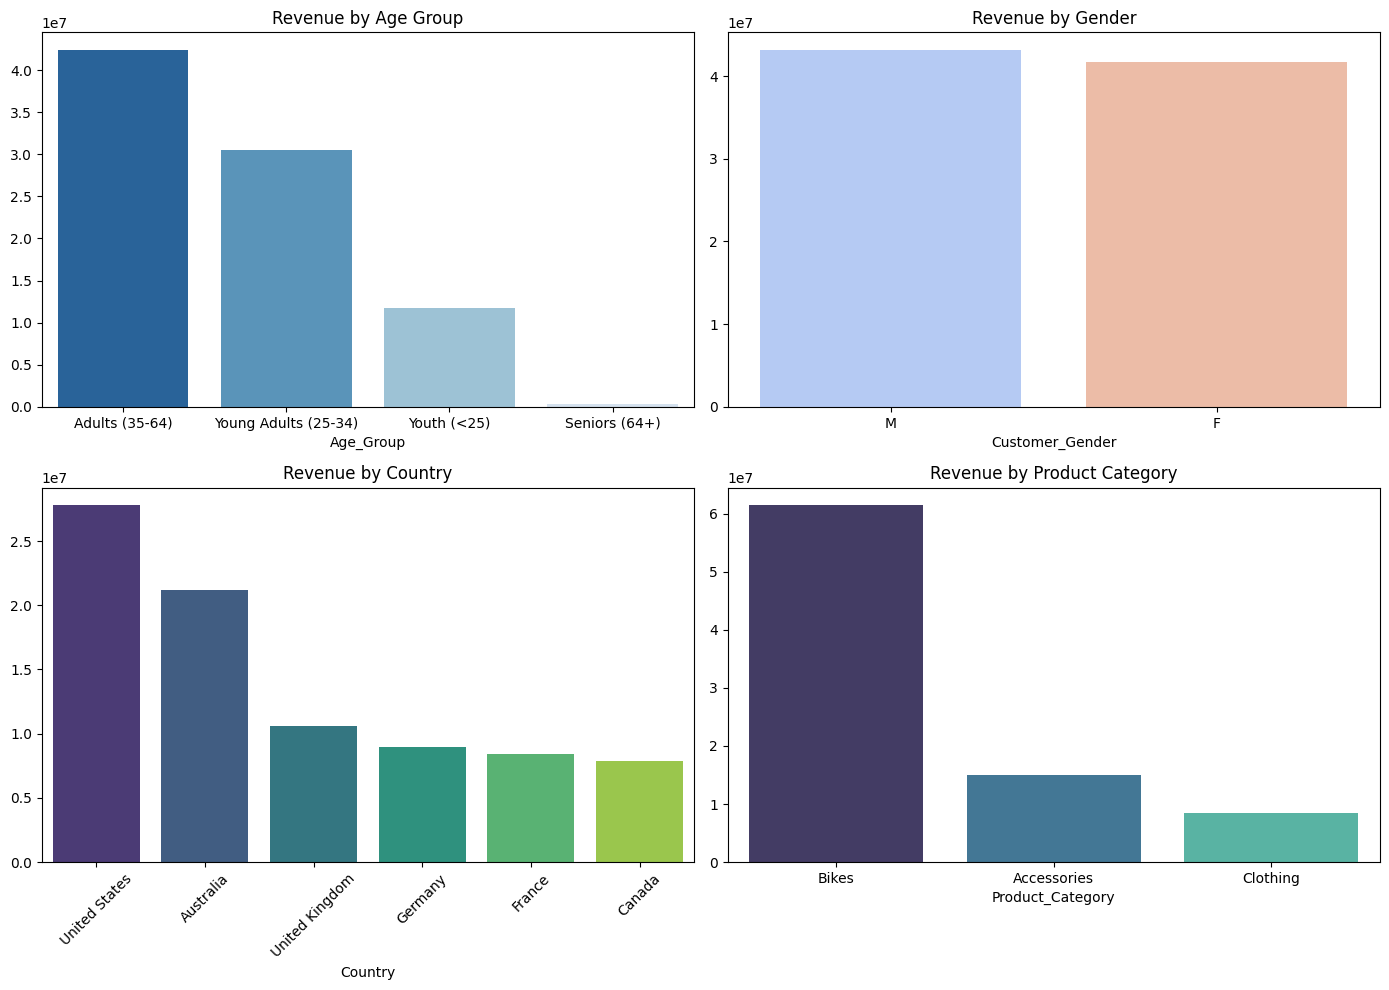

In [ ]:
plt.figure(figsize=(14, 10))

# Age Group
plt.subplot(2, 2, 1)
sns.barplot(x=age_group_sales.index, y=age_group_sales.values, palette="Blues_r")
plt.title("Revenue by Age Group")

# Gender
plt.subplot(2, 2, 2)
sns.barplot(x=gender_sales.index, y=gender_sales.values, palette="coolwarm")
plt.title("Revenue by Gender")

# Country
plt.subplot(2, 2, 3)
sns.barplot(x=country_sales.index, y=country_sales.values, palette="viridis")
plt.title("Revenue by Country")
plt.xticks(rotation=45)

# Product Category
plt.subplot(2, 2, 4)
sns.barplot(x=category_sales.index, y=category_sales.values, palette="mako")
plt.title("Revenue by Product Category")

plt.tight_layout()
plt.show()

# Key Insights from Sales Analysis

- Age Group: **Adults (35–64)** and **Young adults (25-34)** contribute the highest share of revenue.

- Gender: **Male** customers generate more revenue than female customers, indicating stronger purchasing activity among men.

- Country: **The United States leads in total revenue**, followed by Australia, making these regions the top-performing markets.

- Product Category: Bikes account for the largest share of revenue, followed by Accessories and Clothing, confirming the **central importance of bike sales** to overall performance.

Seasons:

- **Winter** has the highest total revenue, making it the most profitable season.

**Spring** is the second-highest, suggesting strong performance in early-year sales.

Autumn and Summer generate lower revenues compared to Winter and Spring.

# Commertial Recommendations

Age Group:
Focus marketing on Adults (35–64) and young adults with premium bikes and youth-friendly designs.

Gender:
Upsell to male customers with bundles and premium options while running targeted campaigns to grow the female customer base.

Country:
Strengthen operations and marketing in the U.S., expand presence in Australia, and explore emerging markets.

Product Category:
Prioritize bike production and inventory while cross-selling accessories and apparel to boost revenue.

Seasonality:
- Increase stock and promotions for Winter (peak season), launch Spring campaigns.

- Prioritize Winter Campaigns: Allocate more marketing budget and inventory during Winter to maximize profits.

- Diversify in Off-Seasons: Since Summer and Autumn are weaker, focus on promotions or bundling strategies to boost sales during those periods.